In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [16]:
ccd = pd.read_excel(r'E:\Classes\Python\New folder\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Credit Card Data.xlsx')
ca = pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv')
rp = pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Repayment.csv')
spend = pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\spend.csv')


In [17]:
ca = ca.drop('No',axis=1)

In [18]:
rp = rp.drop(['Unnamed: 4','SL No:'], axis= 1)

In [19]:
rp = rp.dropna()

In [20]:
rp['Month']= rp['Month'].apply(lambda x:pd.to_datetime(x))

In [21]:
spend = spend.drop('Sl No:',axis=1)

In [22]:
spend['Month']= spend['Month'].apply(lambda x:pd.to_datetime(x))

## 1. In the above dataset,
## a. In case age is less than 18, replace it with mean of age values.

In [23]:
cust_spend = pd.merge(left= ca,right=spend,on= 'Customer')

In [24]:
cust_spend.loc[(cust_spend.Age<18),'Age']=cust_spend.Age.mean()

## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
## (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [25]:
cust_spend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Age       1500 non-null   float64       
 2   City      1500 non-null   object        
 3   Product   1500 non-null   object        
 4   Limit     1500 non-null   float64       
 5   Company   1500 non-null   object        
 6   Segment   1500 non-null   object        
 7   Month     1500 non-null   datetime64[ns]
 8   Type      1500 non-null   object        
 9   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 128.9+ KB


In [26]:
cust_spend['Amount']=np.where(cust_spend.Amount>cust_spend.Limit,cust_spend.Limit/2,cust_spend.Amount)

In [27]:
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


## c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [28]:
cust_repayment = pd.merge(left= ca,right=rp,on= 'Customer')

In [29]:
cust_repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Age       1500 non-null   int64         
 2   City      1500 non-null   object        
 3   Product   1500 non-null   object        
 4   Limit     1500 non-null   float64       
 5   Company   1500 non-null   object        
 6   Segment   1500 non-null   object        
 7   Month     1500 non-null   datetime64[ns]
 8   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 117.2+ KB


In [30]:
cust_repayment['Amount']=np.where(cust_repayment.Amount>cust_repayment.Limit,cust_repayment.Limit/2,cust_repayment.Amount)

In [31]:
cust_repayment.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


## From the above dataset create the following summaries:
## a. How many distinct customers exist?

In [32]:
cust_spend['Customer'].drop_duplicates().count()

100

In [33]:
cust_repayment['Customer'].drop_duplicates().count()

100

## b. How many distinct categories exist?

In [34]:
cust_spend['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

In [35]:
cust_repayment['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

## c. What is the average monthly spend by customers?

In [36]:
cust_spend_amount= cust_spend.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
cust_spend_amount['Spend_Month']=cust_spend_amount['Month'].apply(lambda x:x.month)


In [37]:
Avg_Monthly_spend = cust_spend_amount.groupby(['Customer','Spend_Month'])[['Amount']].mean().reset_index()

In [38]:
Avg_Monthly_spend.head(10)

,Customer,Spend_Month,Amount
0,A1,1,341332.877000
1,A1,2,138421.151250
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
5,A1,10,244534.680000
6,A1,11,183839.610000
7,A10,1,173828.282500
8,A10,2,170265.770000
9,A10,3,134631.266667


## d. What is the average monthly repayment by customers?

In [39]:
cust_repayment_amount= cust_repayment.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
cust_repayment_amount['Repayment_Month']=cust_repayment_amount['Month'].apply(lambda x:x.month)
Avg_Monthly_repayment = cust_repayment_amount.groupby(['Customer','Repayment_Month'])[['Amount']].mean().reset_index()

In [40]:
Avg_Monthly_repayment.head()

,Customer,Repayment_Month,Amount
0,A1,1,325723.331
1,A1,2,137713.785
2,A1,4,254474.580
3,A1,7,297176.740
4,A1,9,186427.500


## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
## (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [41]:
Avg_Monthly_Customers = pd.merge(
    left=Avg_Monthly_spend,
    right=Avg_Monthly_repayment,
    left_on=['Customer', 'Spend_Month'],
    right_on=['Customer', 'Repayment_Month']
)

In [42]:
Avg_Monthly_Customers['Monthly_Profit']=Avg_Monthly_Customers.Amount_y-Avg_Monthly_Customers.Amount_x
Avg_Monthly_Customers['Profit']=np.where(Avg_Monthly_Customers['Monthly_Profit']>0,Avg_Monthly_Customers['Monthly_Profit']*2.9/100,np.nan)


In [43]:
Avg_Monthly_Customers.head(10)

,Customer,Spend_Month,Amount_x,Repayment_Month,Amount_y,Monthly_Profit,Profit
0,A1,1,341332.877000,1,325723.331000,-15609.546000,NaN
1,A1,2,138421.151250,2,137713.785000,-707.366250,NaN
2,A1,4,261649.250000,4,254474.580000,-7174.670000,NaN
3,A1,11,183839.610000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.282500,1,283324.721667,109496.439167,3175.396736
5,A10,2,170265.770000,2,217344.503333,47078.733333,1365.283267
6,A10,3,134631.266667,3,240130.543333,105499.276667,3059.479023
7,A10,4,270721.680000,4,120467.322500,-150254.357500,NaN
8,A10,5,189207.392500,5,98672.695000,-90534.697500,NaN
9,A10,7,239798.030000,7,358194.650000,118396.620000,3433.501980


## f. What are the top 5 product types?

In [44]:
cust_spend.groupby('Type').Amount.sum().reset_index().sort_values('Amount',ascending= False)

,Type,Amount
10,PETRO,28597384.98
4,CAMERA,27690738.44
7,FOOD,20519243.60
0,AIR TICKET,20155847.12
14,TRAIN TICKET,19995825.72
13,SHOPPING,17106660.97
3,BUS TICKET,16279935.35
9,MOVIE TICKET,13001899.29
6,CLOTHES,12302511.36
11,RENTAL,11850628.72


## g. Which city is having maximum spend?

In [45]:
cust_spend.groupby('City').Amount.sum().reset_index().sort_values('Amount',ascending= False)

,City,Amount
4,COCHIN,45963513.50
2,CALCUTTA,41108132.30
0,BANGALORE,40461647.02
1,BOMBAY,28603127.38
3,CHENNAI,22128635.65
7,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
5,DELHI,10918286.54


## h. Which age group is spending more money?

In [46]:
cust_spend['Age_Group']=np.where(((cust_spend.Age.astype(int) >= 18) & (cust_spend.Age.astype(int) < 25)), 'Youth',np.where(((cust_spend.Age.astype(int) >= 25) & (cust_spend.Age.astype(int) < 65)), 'Adult','Senior'))

In [47]:
cust_spend.groupby('Age_Group').Amount.sum()

Age_Group
Adult     1.674181e+08
Senior    3.768249e+07
Youth     1.468050e+07
Name: Amount, dtype: float64

## i. Who are the top 10 customers in terms of repayment?

In [48]:
cust_repayment.groupby('Customer').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [49]:
cust_spend['Yearly_Spend']=cust_spend['Month'].apply(lambda x:x.year)
City_Wise_Data = pd.pivot_table(data = cust_spend, index = 'City', columns=['Product','Yearly_Spend'],values ='Amount', aggfunc='sum')
City_Wise_Data

Product             Gold                              Platimum              \
Yearly_Spend        2004         2005         2006        2004        2005   
City                                                                         
BANGALORE     9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY        6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA      7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI       1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN        7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI         2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA         2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM    2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                       Silver                         
Yearly_Spend        2006        2004       2005        2006  
City                                                         
BANGALORE      685831.27  1291852.58  830612.34  1415480.94  
BOMBAY         972130.01   532089.03  508988.54  1092833.80  
CALCUTTA      3589606.66   500006.00  440147.06  1157956.42  
CHENNAI       5024923.40   282056.86  377184.49   350009.50  
COCHIN        4920592.29   814229.62  652269.38  1269990.87  
DELHI          176788.72   768172.30  612311.21   854899.97  
PATNA         1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM    2147403.75   209667.48  269912.99   555862.12

<Axes: xlabel='City'>

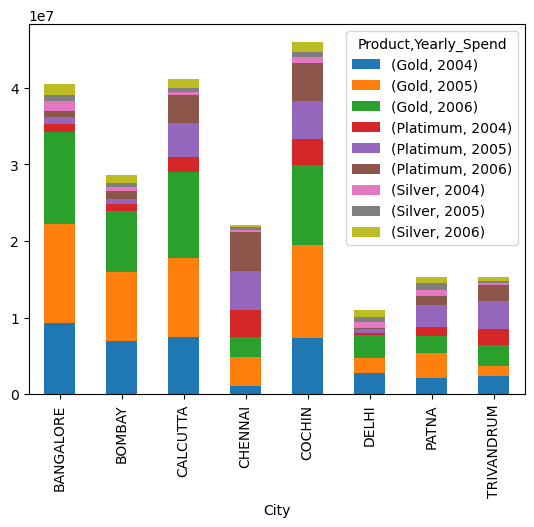

In [50]:
City_Wise_Data.plot(kind='bar',stacked=True)


### 4. Create graphs for
### a. Monthly comparison of total spends, city wise

In [51]:
cust_spend['Monthly_Spend']=cust_spend.Month.apply(lambda x:x.month)

<Axes: xlabel='City'>

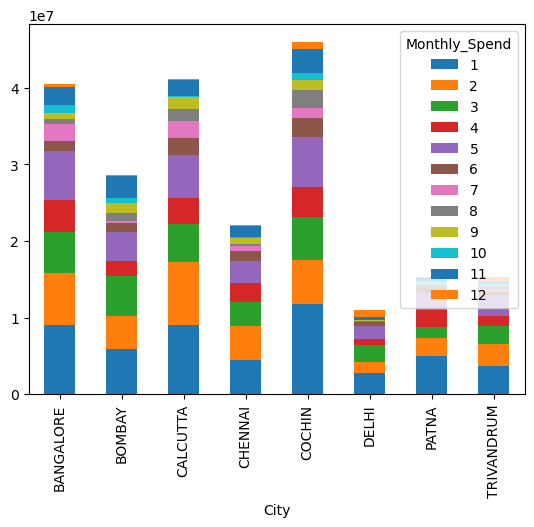

In [52]:
pd.pivot_table(data = cust_spend, index = 'City', columns='Monthly_Spend',
                   values='Amount', aggfunc='sum').plot(kind='bar',stacked=True)

### b. Comparison of yearly spend on air tickets

<Axes: xlabel='Type'>

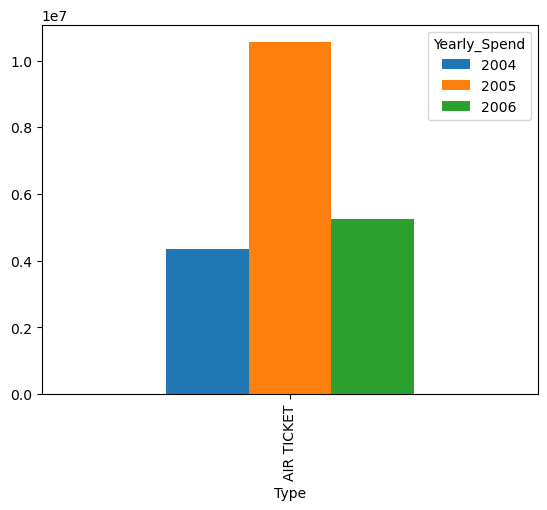

In [53]:
pd.pivot_table(data = cust_spend[cust_spend.Type=='AIR TICKET'], index = 'Type', columns='Yearly_Spend',
                   values='Amount', aggfunc='sum').plot(kind='bar')

## c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

<Axes: xlabel='Product'>

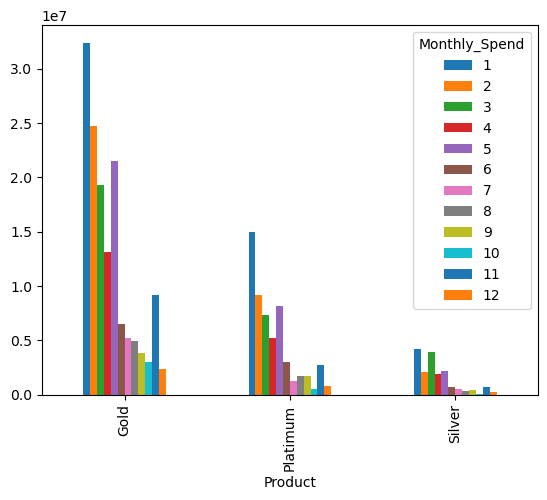

In [54]:
pd.pivot_table(data = cust_spend, index = 'Product', columns='Monthly_Spend',
                   values='Amount', aggfunc='sum').plot(kind='bar')

<Axes: xlabel='Product'>

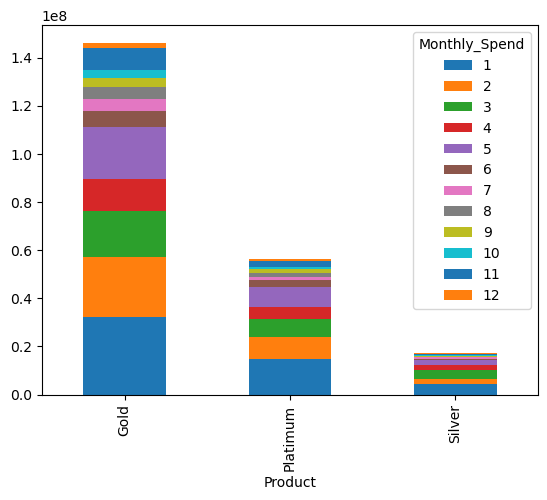

In [55]:
pd.pivot_table(data = cust_spend, index = 'Product', columns='Monthly_Spend',
                   values='Amount', aggfunc='sum').plot(kind='bar',stacked=True)

<Axes: xlabel='Monthly_Spend'>

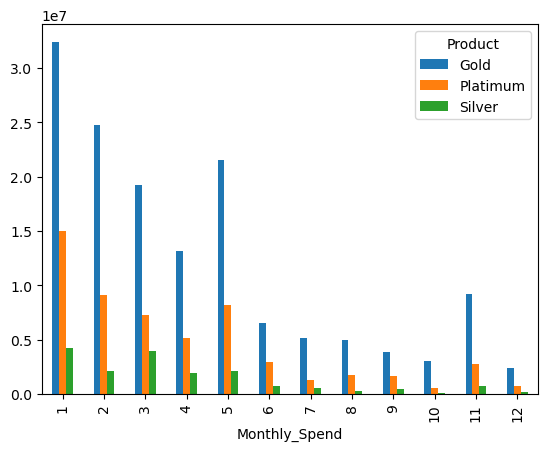

In [56]:
pd.pivot_table(data = cust_spend, index = 'Monthly_Spend', columns='Product',
                   values='Amount', aggfunc='sum').plot(kind='bar')

### 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [57]:
cust_repayment['yearly']=cust_repayment.Month.apply(lambda x:x.year)
cust_repayment['monthly']=cust_repayment.Month.apply(lambda x:x.month)

In [58]:
def top10Customers(product_category,time_period):
        return cust_repayment.loc[(cust_repayment.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [62]:
product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum:"))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly:"))

Please Enter Product Category and product category should be in Gold/Silver/Platinum:Gold
Please Enter Time Period and time period should be in yearly/monthly:yearly


In [63]:
top10Customers_Analysis=top10Customers(product_category,time_period)

In [64]:
top10Customers_Analysis

,Customer,City,Product,yearly,Amount
64,A61,COCHIN,Gold,2005,4276860.55
55,A44,DELHI,Gold,2005,4165317.77
58,A45,COCHIN,Gold,2005,4042447.57
52,A43,BANGALORE,Gold,2005,4006956.60
13,A13,BANGALORE,Gold,2005,3757673.00
65,A61,COCHIN,Gold,2006,3744127.41
61,A60,CALCUTTA,Gold,2005,3742856.10
14,A13,BANGALORE,Gold,2006,3477314.89
38,A29,CALCUTTA,Gold,2006,3434298.00
35,A28,TRIVANDRUM,Gold,2006,3376614.65
